In [1]:
import numpy as np

# Summation unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Activation Functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x):
    return x if x > 0 else 0.01 * x

# Comparator for Error Calculation
def error_calculation(y_true, y_pred):
    return y_true - y_pred

# Example usage
inputs = np.array([0.5, 0.3])
weights = np.array([0.2, -0.75])
print("Summation Output:", summation_unit(inputs, weights))
print("Step Activation:", step_activation(summation_unit(inputs, weights)))
print("Sigmoid Activation:", sigmoid_activation(summation_unit(inputs, weights)))


Summation Output: -0.12499999999999997
Step Activation: 0
Sigmoid Activation: 0.46879062662624377


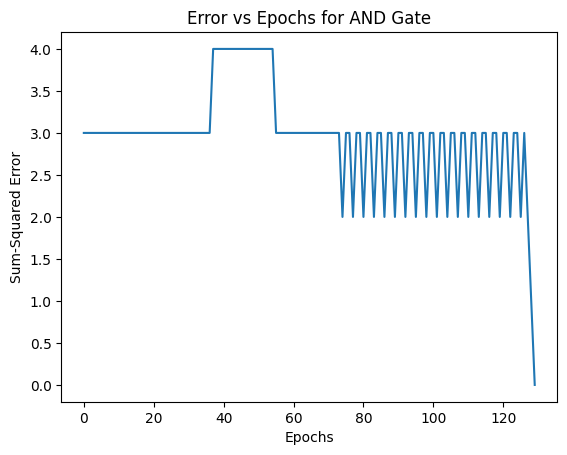

Final Weights: [0.1  0.05]
Final Bias: -0.10000000000000765
Total Epochs: 129


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# AND Gate Inputs and Outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initial Weights and Parameters
W = np.array([0.2, -0.75])  # w1, w2
bias = 10  # W0
learning_rate = 0.05

# Step Activation Function
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron with Step Activation
def perceptron_step(X, y, W, bias, learning_rate):
    epoch_errors = []  # List to track error at each epoch
    epochs = 0
    error_threshold = 0.002

    while epochs < 1000:
        total_error = 0
        for i in range(len(X)):
            # Summation (Weighted sum + bias)
            weighted_sum = np.dot(X[i], W) + bias
            output = step_activation(weighted_sum)
            # Error Calculation (Target - Output)
            error = y[i] - output
            total_error += error ** 2
            # Update weights and bias
            W += learning_rate * error * X[i]
            bias += learning_rate * error
        
        # Append total error for each epoch
        epoch_errors.append(total_error)
        
        # Break if error is less than or equal to the threshold
        if total_error <= error_threshold:
            break
        epochs += 1

    return W, bias, epochs, epoch_errors

# Train perceptron for AND Gate
final_weights, final_bias, total_epochs, error_values = perceptron_step(X, y, W, bias, learning_rate)

# Plot Epochs vs Error for AND Gate
plt.plot(range(len(error_values)), error_values)  # Fix: Use len(error_values) instead of total_epochs
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error vs Epochs for AND Gate')
plt.show()

# Print the final weights, bias, and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Final Bias: {final_bias}")
print(f"Total Epochs: {total_epochs}")


In [3]:
import numpy as np

# Perceptron Function with Different Activation Functions
def perceptron(X, y, W, bias, learning_rate, activation_func):
    epochs = 0
    error_threshold = 0.002
    epoch_errors = []

    while epochs < 1000:
        total_error = 0
        for i in range(len(X)):
            output = activation_func(np.dot(X[i], W) + bias)
            output = 1 if output >= 0.5 else 0  # For sigmoid and continuous activations
            error = y[i] - output
            total_error += error ** 2
            W += learning_rate * error * X[i]
            bias += learning_rate * error
        
        epoch_errors.append(total_error)
        if total_error <= error_threshold:
            break
        epochs += 1

    return W, bias, epochs, epoch_errors

# List of Activation Functions
activations = [bipolar_step_activation, sigmoid_activation, relu_activation]

# AND Gate Inputs and Outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
W = np.array([0.2, -0.75])  # w1, w2
bias = 10  # W0
learning_rate = 0.05

# Iterate through each activation function
for activation in activations:
    _, _, epochs, _ = perceptron(X, y, W, bias, learning_rate, activation)
    print(f"Activation: {activation.__name__}, Epochs: {epochs}")


Activation: bipolar_step_activation, Epochs: 129
Activation: sigmoid_activation, Epochs: 123
Activation: relu_activation, Epochs: 117


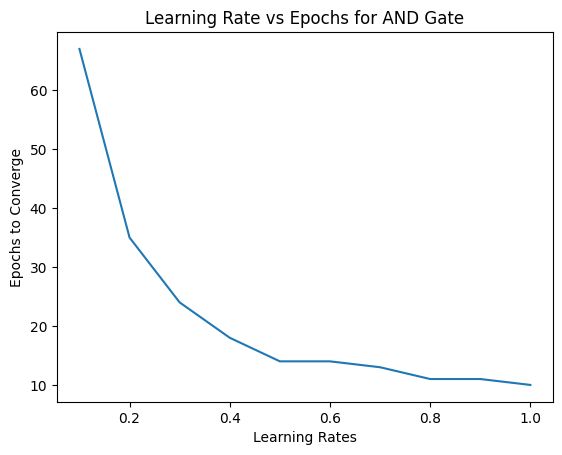

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron with Step Activation
def perceptron_step(X, y, W, bias, learning_rate):
    epochs = 0
    error_threshold = 0.002
    epoch_errors = []

    while epochs < 1000:
        total_error = 0
        for i in range(len(X)):
            output = step_activation(np.dot(X[i], W) + bias)
            error = y[i] - output
            total_error += error ** 2
            W += learning_rate * error * X[i]
            bias += learning_rate * error
        
        epoch_errors.append(total_error)
        if total_error <= error_threshold:
            break
        epochs += 1

    return epochs

# AND Gate Inputs and Outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
W = np.array([0.2, -0.75])  # w1, w2
bias = 10  # W0

# Varying Learning Rates
learning_rates = [0.1 * i for i in range(1, 11)]
epochs_list = []

for lr in learning_rates:
    epochs = perceptron_step(X, y, W, bias, lr)
    epochs_list.append(epochs)

# Plot Learning Rate vs Epochs
plt.plot(learning_rates, epochs_list)
plt.xlabel('Learning Rates')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Epochs for AND Gate')
plt.show()
